In this file i will use unsupervised learning techniques - clustering to try to discover new information about our data that isn't visible using simple statistical methods.
First i will import all the needed dependencies. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
plt.style.use('dark_background')

Most clustering techniques require numerical data , whereas our dataset is comprised of a lot of binary/onehot columns.
In order for clustering techniques to work , i will convert the dataset to a numeric representation using PCA.

In [4]:
data=pd.read_csv('./data/preprocessed_final_data.csv',sep=',')
y=data['y']
data=data.drop(['y'],axis=1)

The parameter passed to PCA suggests the initial information retention , i will use 0.9 which means 90% which is a good approximation.

In [5]:
pca=PCA(0.9)
pca.fit(data)
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

t_d=pca.transform(data)

First i will use the k-means clustering method.In this method we provide the number of clusters that we want the dataset space to be split beforehand.
This means we need to determine the optimal number of clusters beforehand.A good k value is one that minimizes the intra-cluster sum of square distances between datapoints.
This means we can iterate k for different values and calculate the sum of squares each time and then plot the results for each k.
We can determine the optimal number of clusters by finding the plot point where there is an 'elbow' , the point where the graph slope starts to stabilize.

Lets calculate the intra cluster sum of squares for each value of k from 1 to 10.

In [6]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(t_d)
    sse.append(kmeans.inertia_)

Now i will plot the results to find the elbow point.

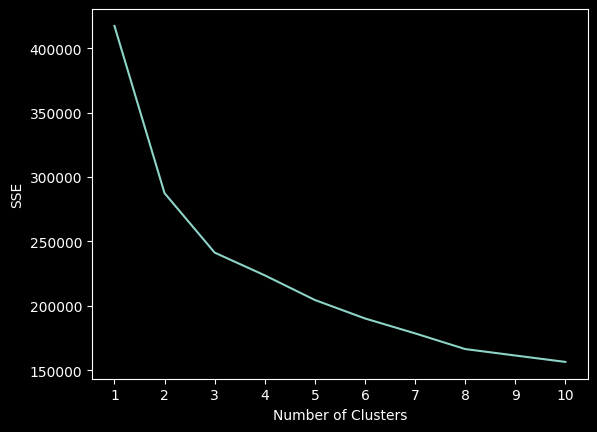

In [7]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

As we can see , the elbow point of the graph seems to be k=3.I will perform clustering now using k=3.

In [8]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(t_d)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

Assign each record its label based on clustering.

In [9]:
data['labels']=kmeans.labels_
data['y']=y

Now , i will try to see if there is any particular cluster with a high percentage of minority - 'yes' class records.

In [10]:
print("Cluster 0 has :",data[data.labels==0].query("y==1").shape[0]/data[data.labels==0].shape[0]," precent of minority samples")
print("Cluster 1:",data[data.labels==1].query("y==1").shape[0]/data[data.labels==1].shape[0]," precent of minority samples")
print("Cluster 2:",data[data.labels==2].query("y==1").shape[0]/data[data.labels==2].shape[0]," precent of minority samples")

Cluster 0 has : 0.04962810438290541  precent of minority samples
Cluster 1: 0.19456471672040535  precent of minority samples
Cluster 2: 0.6309263311451495  precent of minority samples


As we can see , cluster 2 has a high percentage of minority class records and cluster 1 has a higher percentage compared to the initial 11% present in our dataset.
Let's see how many records of the minority class each cluster contains.

In [11]:
print("Cluster 0 has ",data[data['labels']==0].shape[0]," total records"," where ",data[data['labels']==0].query("y==1").shape[0]," are minority class records")
print("Cluster 1 has ",data[data['labels']==1].shape[0]," total records"," where ",data[data['labels']==1].query("y==1").shape[0]," are minority class records")
print("Cluster 2 has ",data[data['labels']==2].shape[0]," total records"," where ",data[data['labels']==2].query("y==1").shape[0]," are minority class records")

Cluster 0 has  23797  total records  where  1181  are minority class records
Cluster 1 has  10855  total records  where  2112  are minority class records
Cluster 2 has  1371  total records  where  865  are minority class records


As we can see , even though cluster 2 had a high percentage of minority class records , most of these records exist in the other clusters , meaning we weren't able to split the dataset feature space that well and seperate the classes.